# ORM
- É a camada que traduz e efetua a comunicação entre as models e o banco de dados. 
- Podemos ver as migrations dentro de `aplicativo/migrations/`. Elas são instruções para o banco de dados. O ORM do django interpreta, traduz para script SQL e executa os comandos no banco de dados.

# Cadastrando a model no sistema
- Para que possamos acessar os dados da model no nosso admin do django, temos de registrá-las no arquivo `admin.py` do nosso app. Sem registrar, mesmo já criando a model e aplicando o migrate, ele não é exibido no painel do administrador.
- Para cadastrar, usamos:
```python
# Arquivo admin.py da app
from django.contrib import admin
from .models import Car

class CarAdmin(admin.ModelAdmin):
    list_display = ('model', 'brand', 'factory_year', 'model_year', 'value')   
    search_field = ('model',)

admin.site.register(Car, CarAdmin)
```

## list_dislpay
- AQui listamos quais campos queremos que sejam exibidos na grid do admin.

## search_field
- É o campo de busca. É o que queremos buscar para que, através dessa busca, encontremos os carros (no caso do nosso projeto)

## `admin.site.register(Car, CarAdmin)`
- Aqui nós registramos de fato no nosso painel do administrador, onde informamos a model (importada do arquivo models.py) e a classe do Admin com as configurações que desejamos.

---

# Configurações adicionais

## Configurando o Django para operar em português
- Em `settings.py`, alteramos:
```python
LANGUAGE_CODE = 'pt-br' #antes era en
TIME_ZONE = 'America/Sao_Paulo'
```


## Resolvendo problema do `car_object`
- Da maneira que fizemos, ao acessar um carro, ele é exibido com `Car object(2)`. Para corrigir isso, devemos definir o método `__str__` e ele passará a ser exibido como o nome do modelo do carro.
- Além de melhorar a visibilidade no painel do admin, também é útil quando formos efetuar consultar no banco de dados através do ORM do django.

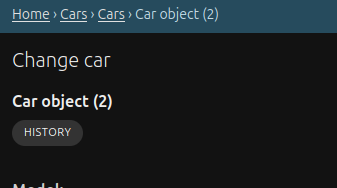

---

# Fazendo com que seja exibida uma lista de carros para seleção
- Para criar isso é preciso que não tenhamos nada registrado na tabela de carros.
- O objetivo é listar as marcas disponíveis que estejam cadastradas. Para isso, iremos criar uma outra tabela para as marcas. Isso permitirá uma ligação entre tabelas usando chave estrangeira.


## Criando model de marca
```python
class Brand(models.Model):
    id = models.AutoField(primary_key=True)
    name = models.CharField(max_length=200)

    def __str__(self):
    return self.name
```

- Além disso, precisamos alterar a nossa tabela `Car`. Agora o campo `brand` deixará de ser um `CharField` e passará a ser um `models.ForeignKey`

```python
# model Car
class Car(models.Model):
    # ... tudo continua normal
    brand = models.ForeignKey(Brand, on_delete=models.PROTECT, related_name='car_brand')
```
- Agora nos referenciamos a uma chave estrangeira da tabela `Brand`, que é referenciada como o primeiro argumento.
- O `on_delete=models.PROTECT` determina que não podemos deletar a marca, visto que existem vários carros cadastrados com aquela marca. No lugar do PROTECT poderia ser CASCADE, onde todos os carros daquela marca seriam deletados junto dela.
- O `related_name=car_brand` determina um nome para a relação. 

---

# Adicionando um campo para a placa do carro
- Adicionamos ao model Car o campo `plate = models.CharField(max_length=10, blank=True, null=True)`

# Adicionando imagens no banco de dados
- Armazenaremos o caminho da imagem dentro do nosso projeto
- Para isso, usamos:
```python
photo = models.ImageField(upload_to='cars/')
```

- Em `upload_to` passamos o caminho onde as imagens deverão ser armazenadas.

## Observação
- Para que possamos armazenar imagens, devemos instalar a biblioteca Pillow.

## Configurando upload de imagens
- Além da biblioteca instalada, temos de ir em `settings.py` e adicionar:
```python
MEDIA_ROOT = os.path.join(BASE_DIR, 'media')
MEDIA_URL = '/media/'
```
- Aqui, configuramos a URL de mídia padrão e a URL root vai ser media também. 
- Basicamente, isso define que criaremos uma pasta chamada `media` em `BASE_DIR` que armazenará as imagens. Ela será upada na pasta definida em `upload_to='cars/'`, ou seja, dentro de `media` será criada uma pasta `cars`, ficando `BASE_DIR/media/cars`.

### Uma última configuração para imagens
- Por fim, temos de ir no `urls.py` do projeto e, após o fim da lista `urlpatterns`, adicionamos o seguinte trecho:

```python
from django.conf import settings
from django.conf.urls.static import static

urlpatterns = [
    path('admin/', admin.site.urls),
] + static(settings.MEDIA_URL, document_root = settings.MEDIA_ROOT)
```